## BigMart Sales Prediction
##### Introduction:
BigMart is a popular retail chain that operates in multiple countries. They maintain a number of stores which sell various types of products. The goal of this project is to predict the sales of the products sold in their stores based on various features such as product type, store location, and other attributes. This project involves applying machine learning techniques such as regression analysis, feature engineering, data cleaning, exploratory data analysis, and model evaluation. The main objective is to develop an accurate model that can predict the sales of the products sold in BigMart stores.



### Importing necessary libraries

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Loading the Dataset

In [71]:
train_df = pd.read_csv("Train.csv")
test_df = pd.read_csv("Test.csv")

In [72]:
train_df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Exploratory Data Analysis

In [73]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [74]:
train_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [75]:
# Checking for missing values
print(train_df.isnull().sum())
print(test_df.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64
Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


In [76]:
# Clean the data
# train_df.dropna(inplace=True)

# Filling missing values
train_df['Item_Weight'].fillna(train_df['Item_Weight'].mean(), inplace=True)
test_df['Item_Weight'].fillna(test_df['Item_Weight'].mean(), inplace=True)

train_df['Outlet_Size'].fillna('Unknown', inplace=True)
test_df['Outlet_Size'].fillna('Unknown', inplace=True)

In [77]:
train_df['Outlet_Size'].value_counts()

Medium     2793
Unknown    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

In [78]:
train_df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [79]:
train_df.groupby('Outlet_Type')['Item_Outlet_Sales'].mean()

Outlet_Type
Grocery Store         339.828500
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Supermarket Type3    3694.038558
Name: Item_Outlet_Sales, dtype: float64

In [80]:
train_df.groupby(['Outlet_Type', 'Outlet_Location_Type'])['Item_Outlet_Sales'].mean()

Outlet_Type        Outlet_Location_Type
Grocery Store      Tier 1                   340.329723
                   Tier 3                   339.351662
Supermarket Type1  Tier 1                  2313.099451
                   Tier 2                  2323.990559
                   Tier 3                  2298.995256
Supermarket Type2  Tier 3                  1995.498739
Supermarket Type3  Tier 3                  3694.038558
Name: Item_Outlet_Sales, dtype: float64

### Item Identify

In [81]:
for i in train_df.columns:
    print(f"----{i}----\n")
    print(train_df[i].value_counts())
    print('='*40)

----Item_Identifier----

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64
----Item_Weight----

12.857645    1463
12.150000      86
17.600000      82
13.650000      77
11.800000      76
             ... 
7.275000        2
7.685000        1
9.420000        1
6.520000        1
5.400000        1
Name: Item_Weight, Length: 416, dtype: int64
----Item_Fat_Content----

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
----Item_Visibility----

0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64
----Item_Type----

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              

In [82]:
print("Training Shape: ",train_df.shape)
print("Testing Shape:", test_df.shape)

Training Shape:  (8523, 12)
Testing Shape: (5681, 11)


### Visualize the data
####  Visualizing the data is an effective way to discover patterns and relationships between different variables:

In [83]:
fig=px.histogram(train_df,x='Item_Type',template='plotly_dark')
fig.show()

In [84]:
sns.catplot(data=train_df, x="Outlet_Size", kind="count");

In [85]:
sns.histplot(train_df['Item_Outlet_Sales'])

<Axes: xlabel='Outlet_Size', ylabel='count'>

In [86]:
sns.scatterplot(x='Item_Weight', y='Item_Outlet_Sales', data=train_df)

<Axes: xlabel='Outlet_Size', ylabel='count'>

In [87]:
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=train_df)

<Axes: xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

### Correlation analysis
#### Correlation analysis involves examining the relationship between different variables:

In [88]:
sns.heatmap(train_df.corr(), annot=True)

<Axes: >

### Start creating ML model

In [89]:
# library from preprocessing Module.
from sklearn.preprocessing import StandardScaler, OrdinalEncoder


# library from model selection Module
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LinearRegression
from sklearn.tree import  DecisionTreeRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

from sklearn.metrics import r2_score, mean_squared_error

In [90]:
cols = ['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Size',	'Outlet_Location_Type','Outlet_Type','Item_Fat_Content']

ord = OrdinalEncoder()
ord.fit(train_df[cols])
train_df[cols] = ord.transform(train_df[cols])
train_df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156.0,9.300000,1.0,0.016047,4.0,249.8092,9.0,1999,1.0,0.0,1.0,3735.1380
1,8.0,5.920000,2.0,0.019278,14.0,48.2692,3.0,2009,1.0,2.0,2.0,443.4228
2,662.0,17.500000,1.0,0.016760,10.0,141.6180,9.0,1999,1.0,0.0,1.0,2097.2700
3,1121.0,19.200000,2.0,0.000000,6.0,182.0950,0.0,1998,3.0,2.0,0.0,732.3800
4,1297.0,8.930000,1.0,0.000000,9.0,53.8614,1.0,1987,0.0,2.0,1.0,994.7052
5,758.0,10.395000,2.0,0.000000,0.0,51.4008,3.0,2009,1.0,2.0,2.0,556.6088
6,696.0,13.650000,2.0,0.012741,13.0,57.6588,1.0,1987,0.0,2.0,1.0,343.5528
7,738.0,12.857645,1.0,0.127470,13.0,107.7622,5.0,1985,1.0,2.0,3.0,4022.7636
8,440.0,16.200000,2.0,0.016687,5.0,96.9726,7.0,2002,3.0,1.0,1.0,1076.5986
9,990.0,19.200000,2.0,0.094450,5.0,187.8214,2.0,2007,3.0,1.0,1.0,4710.5350


In [91]:
# Splitting data into training and testing set
X = train_df.drop(columns = ['Item_Outlet_Sales'])
y = train_df['Item_Outlet_Sales'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30, random_state=20)
print('X_train:',len(X_train))
print('X_test:',len(X_test))
print('y_train',len(y_train))
print('y_test',len(y_test))

X_train: 5966
X_test: 2557
y_train 5966
y_test 2557


In [92]:
num_features = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']

scaler = StandardScaler()

scaler.fit(X_train[num_features])

# Apply the scaler to the training and testing sets
X_train[num_features] = scaler.transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])


### Linear Regression Model

In [93]:
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the sales for test data
y_pred = model.predict(X_test)

#checking score
print(f"score of linear Regression model: {model.score(X_train, y_train)}")


# Evaluate the performance of the model
linear_reg= np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean squared error: %.2f' % linear_reg )
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

score of linear Regression model: 0.5018057228494006
Root Mean squared error: 1198.99
Mean squared error: 1437568.03
Coefficient of determination: 0.50


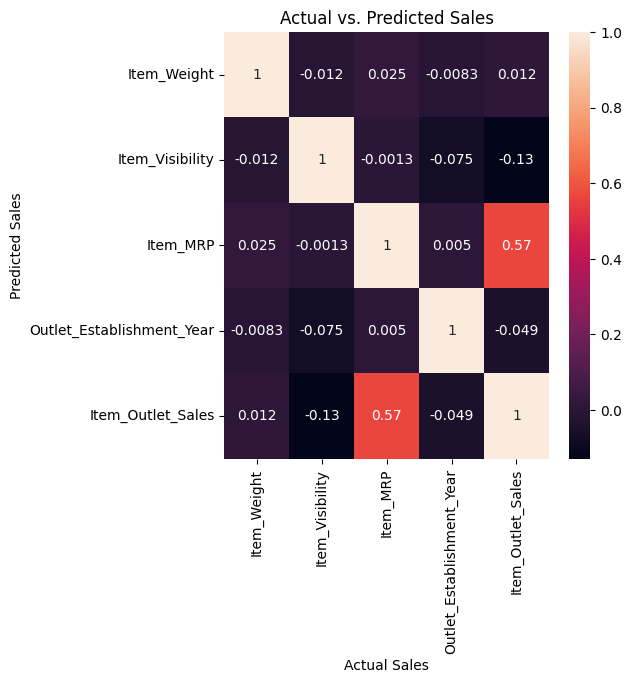

In [94]:
# Visualize the results
plt.scatter(y_test, y_pred, color='red')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.show()

### Random Forest Model

In [95]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predict the sales for test data
y_pred = model.predict(X_test)

#checking score
print(f"score of Random Forest Regressor model: {model.score(X_train, y_train)}")

# Evaluate the performance of the model
random_forest= np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean squared error: %.2f' % random_forest )
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))


score of Random Forest Regressor model: 0.9363744931685938
Root Mean squared error: 1124.40
Mean squared error: 1264275.66
Coefficient of determination: 0.56


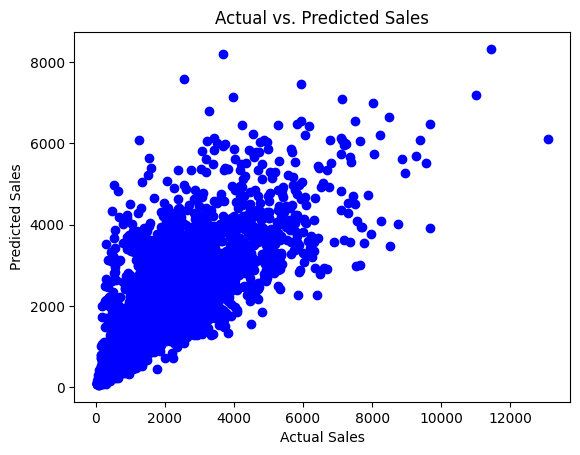

In [96]:
# Visualize the results
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.show()

### Decision Tree Regressor

In [97]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#checking score
print(f"score of Decision Tree Regressor model: {model.score(X_train, y_train)}")

# Evaluate the performance of the model
decision_tree= np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean squared error: %.2f' % decision_tree )

print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

score of Decision Tree Regressor model: 1.0
Root Mean squared error: 1512.57
Mean squared error: 2287873.66
Coefficient of determination: 0.21


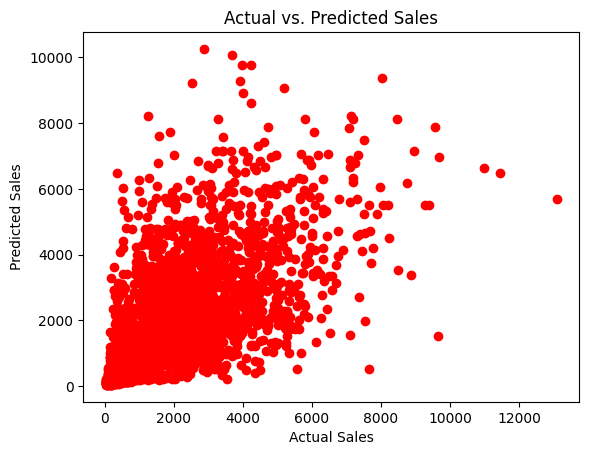

In [98]:
# Visualize the results
plt.scatter(y_test, y_pred, color='red')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.show()

### SVM Model

In [99]:
model = SVR()
model.fit(X_train, y_train)

# Predict the sales for test data
y_pred = model.predict(X_test)

#checking score
print(f"score of SVM model: {model.score(X_train, y_train)}")

# Evaluate the performance of the model
svm= np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean squared error: %.2f' % svm)

print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

score of SVM model: -0.054980917901734205
Root Mean squared error: 1737.13
Mean squared error: 3017622.47
Coefficient of determination: -0.05


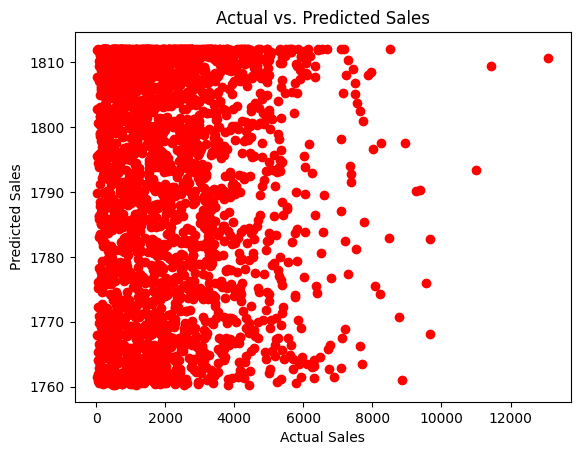

In [100]:
# Visualize the results
plt.scatter(y_test, y_pred, color='red')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.show()

### XGBoost 

In [101]:
# create an xgboost regression model
model = XGBRegressor()
model.fit(X_train, y_train)

# Predict the sales for test data
y_pred = model.predict(X_test)

#checking score
print(f"score of XGBoost model: {model.score(X_train, y_train)}")


# Evaluate the performance of the model
xgb= np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean squared error: %.2f' %(xgb) )
print('Mean squared error: %.2f' % (mean_squared_error(y_test, y_pred)))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

score of XGBoost model: 0.8719271041153045
Root Mean squared error: 1152.60
Mean squared error: 1328481.39
Coefficient of determination: 0.54


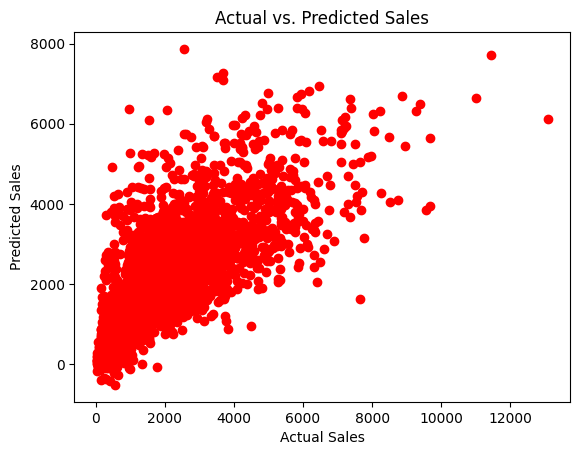

In [102]:
# Visualize the results
plt.scatter(y_test, y_pred, color='red')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.show()

In [103]:
result = pd.DataFrame({'Model' : ['LINEAR REGRESSION','RANDOM FOREST','DECISION TREE','SVM','XGBoost'],
                       'Result' : [linear_reg,random_forest,decision_tree,svm ,xgb]})
result_df = result.sort_values(by='Result',ascending=True)
result_df = result_df.set_index('Result')
result_df

,Model
Result,
1124.400134,RANDOM FOREST
1152.597669,XGBoost
1198.986250,LINEAR REGRESSION
1512.571870,DECISION TREE
1737.130527,SVM
